In [47]:
from IPython import display
from matplotlib import pyplot as plt
from mxnet import nd, autograd
import random
%matplotlib inline
display.set_matplotlib_formats("svg")

## Generate data sets
- randomly generate $x\in\mathbb{R}^{1000\times 2}$
- true_w: $w=[2,-3.4]^\top$
- true_b: $b=4.2$
- generate true label by $y=Xw+b+\epsilon$ with noise $\epsilon$ obeying a normal distribution with a mean of 0 and standard derivation of 0.01, i.e.:$\epsilon\sim N(0,0.01)$

In [48]:
num_inputs = 2
num_example = 1000
true_w = nd.array([2,-3.4])
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_example, num_inputs))
labels = nd.dot(features, true_w) + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

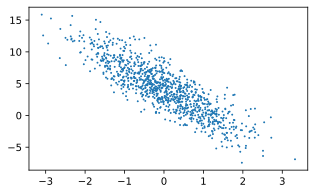

In [49]:
plt.figure(figsize=(5,3))
plt.scatter(features[:,1].asnumpy(), labels.asnumpy(), 1)

## reading data

In [50]:
def data_iter(batch_size, features, labels):
    num_example = len(features)
    indices = list(range(num_example))
    random.shuffle(indices)
    for i in range(0, num_example, batch_size):
        j = nd.array(indices[i:min(i+batch_size, num_example)])
        yield features.take(j), labels.take(j)

In [51]:
x,y = next(data_iter(10, features, labels))
print(x,y)


[[ 0.12866306 -0.17992364]
 [ 0.14085004  1.83525   ]
 [-1.01282     0.83382213]
 [ 0.5261248   0.974988  ]
 [ 0.47072732 -1.2700677 ]
 [ 0.9727316   0.6973312 ]
 [-1.0225859  -3.063631  ]
 [-0.906991    0.6758726 ]
 [ 1.4066963   0.38680613]
 [-0.42692387  0.22964495]]
<NDArray 10x2 @cpu(0)> 
[ 5.081848   -1.7467401  -0.66761625  1.9380343   9.472205    3.782395
 12.586124    0.07608862  5.7014637   2.5691102 ]
<NDArray 10 @cpu(0)>


In [52]:
x,y = next(data_iter(10, features, labels))
print(x,y)


[[-0.76623863  0.11933806]
 [-0.00287818 -0.14108162]
 [ 0.47072732 -1.2700677 ]
 [-2.1351657   0.27854246]
 [ 0.7739936  -1.1159735 ]
 [ 0.6016441  -0.9086833 ]
 [-0.06078022  0.5604461 ]
 [-0.63144183 -0.6818402 ]
 [ 0.25477767  1.3349023 ]
 [-0.5302544   0.72284514]]
<NDArray 10x2 @cpu(0)> 
[ 2.2794538   4.684138    9.472205   -1.0077038   9.538005    8.4924965
  2.1775832   5.257084    0.17874661  0.7078539 ]
<NDArray 10 @cpu(0)>


## Initialize model parameters

In [53]:
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))

## attach gradients to parameters

In [54]:
w.attach_grad()
b.attach_grad()

## define the linear model

In [55]:
def linreg(x, w, b):
    return nd.dot(x,w)+b

## define the loss function

In [56]:
def squared_loss(y_hat, y):
    return (y_hat-y.reshape(y_hat.shape))**2/2

## define the optimization algorithom

In [57]:
def sgd(params, lr, batch_szie):
    for param in params:
        param[:] = param - lr*param.grad/batch_szie

## training

In [63]:
batch_size = 10
lr = 0.1
num_epochs = 3
net = linreg
loss = squared_loss

w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))

w.attach_grad()
b.attach_grad()

for epoch in range(num_epochs):
    for x,y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(x,w,b), y)
        l.backward()
        sgd([w,b], lr, batch_szie)
    train_l = loss(net(features, w, b), labels)
    print("epoch {}, loss {}".format(epoch+1, train_l.mean().asnumpy()))

epoch 1, loss [5.2665564e-05]
epoch 2, loss [5.208935e-05]
epoch 3, loss [5.2750485e-05]


## evaluate the trained model

In [64]:
print("error in w:", true_w-w.reshape(true_w.shape))
print("error in b:", true_b-b)

error in w: 
[0.00075865 0.00094748]
<NDArray 2 @cpu(0)>
error in b: 
[-0.00126934]
<NDArray 1 @cpu(0)>
